In [2]:
import pandas as pd
import numpy 
import os
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment= None # default='warn'

df=pd.read_csv(r'C:\Users\karan\Desktop\AI_ML_ASSIGNMENTS\sales_full_data.csv')
df=df.dropna()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09-01-19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Q1)Which month had the highest and lowest sales? What do you think the reason for this was?

In [3]:

pd.options.mode.chained_assignment = None
#extracting the month using order date
df=df[df['Order Date'].str[0:2]!='Or']

#creating month column
df['Month']=df['Order Date'].str[0:2]
df['Month']=df['Month'].astype('int32')

#creating sales column
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])

#Calculating the Sales in each month
df['Sales']=df['Quantity Ordered']*df['Price Each']
df.head()
df.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


<function matplotlib.pyplot.show(close=None, block=None)>

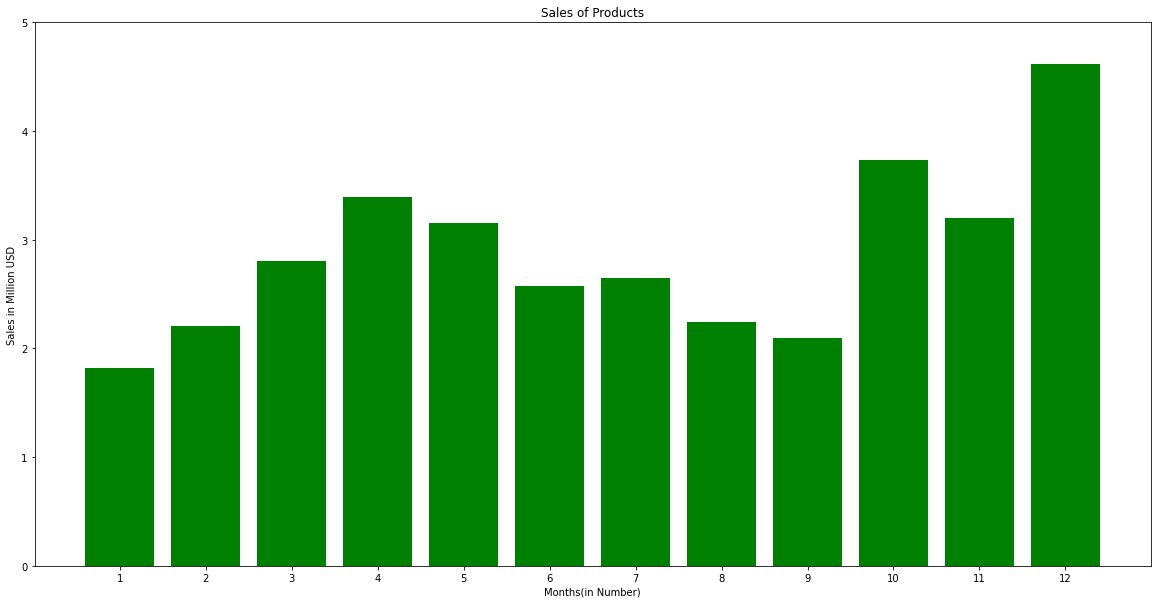

In [4]:
#visualizing the results
#bar graph which visualises the sales of product every month
import matplotlib.pyplot as plt

months=range(1,13)
results=df.groupby('Month').sum()
plt.figure(figsize=(20,10))
plt.bar(months,results['Sales'],color='green')
plt.xticks(months)
labels,location=plt.yticks()
plt.yticks(labels,(labels/1000000).astype(int))
plt.ylabel('Sales in Million USD')
plt.xlabel('Months(in Number)')
plt.title('Sales of Products')
plt.show

As we can clearly see from the bar graph the highest sales were in the month of December and the lowest were in the month of January.
Since the dataset porvided is of the sales of products in the United States Of America,the sales in the month of December is the highest beacause its the time of holidays i.e Christmas and New Years.January sees the lowest sales because most of the people spent their money in December.
We can also see a rise of sales from January to April which could mean there was a sale in April. 

Q2)At what time of the day would you put out advertisements so that sales increase?

In [5]:
#Q2
pd.options.mode.chained_assignment = None
df['Order_Date_DTO'] = pd.to_datetime(df['Order Date'],errors='coerce')
#to extract the hour of purchase
df['Hour']=df['Order_Date_DTO'].dt.hour
df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Order_Date_DTO,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,2019-04-30 09:27:00,9


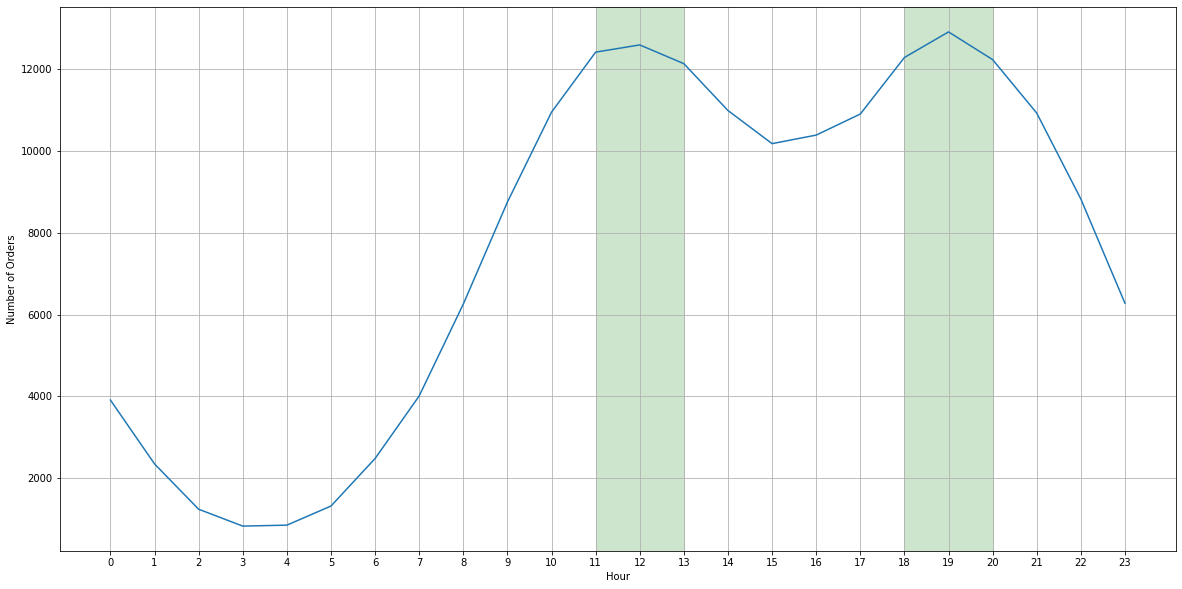

In [7]:
#grouping the data according to the hour of purchase
res2 = df.groupby(['Hour']).count()
res2 = df.groupby(['Hour'])['Quantity Ordered'].count()
hours=[hour for hour,df in df.groupby('Hour')]
#visualising the data
plt.figure(figsize=(20,10))
plt.plot(hours,res2)
plt.axvspan(11,13,color='green',alpha=0.2)
plt.axvspan(18,20,color='green',alpha=0.2)
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

As we can see from the line chart above the most sales occoured during 11:00am to 1:00pm and also 6:00pm to 8:00pm. So logically the best time to advertise the products is from 11:00am to 1:00pm or in the evening from 6:00pm to 8:00pm 

Q3)What products were sold the most?

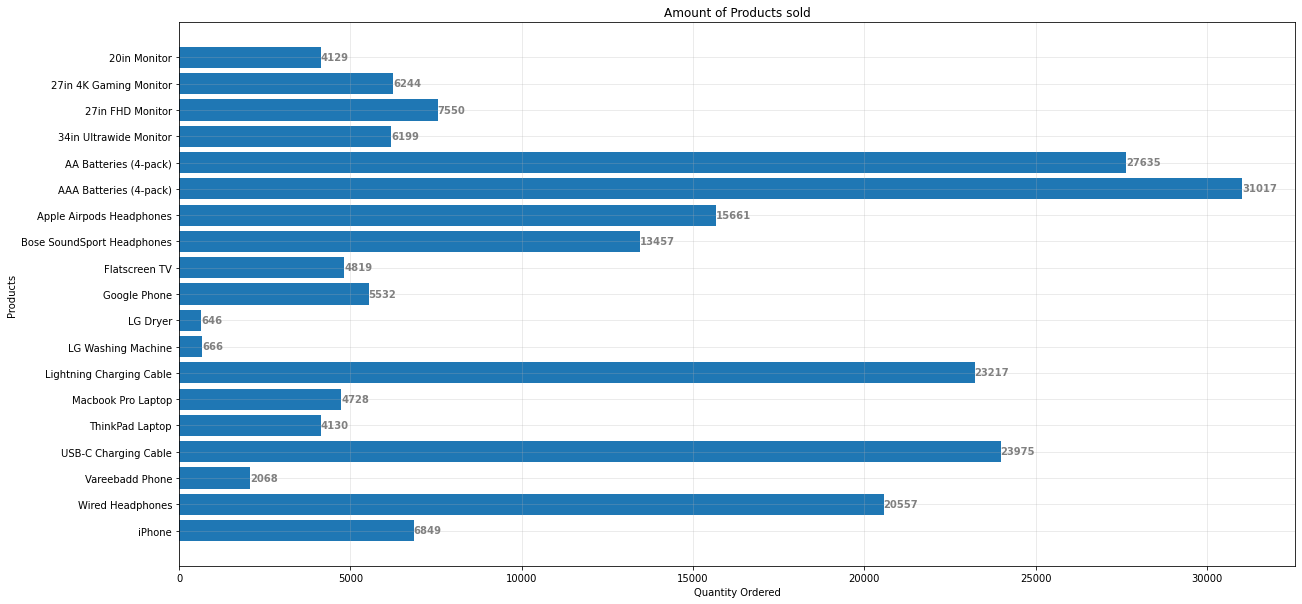

In [8]:
product_grp=df.groupby('Product')
#visualising
quantity_ordered=product_grp.sum()['Quantity Ordered']
products=[product for product,df in product_grp]
fig,ax=plt.subplots(figsize=(20,10))
ax.barh(products,quantity_ordered)
ax.grid(alpha=0.3)
ax.invert_yaxis()
#to display the highest value of each product
for i in ax.patches:
    plt.text(i.get_width()+0.2,i.get_y()+0.5,
    str(round((i.get_width()),2)),
    fontsize=10,fontweight='bold',
    color='grey')

ax.set_xlabel('Quantity Ordered')
ax.set_ylabel('Products')
ax.set_title('Amount of Products sold')

plt.show()

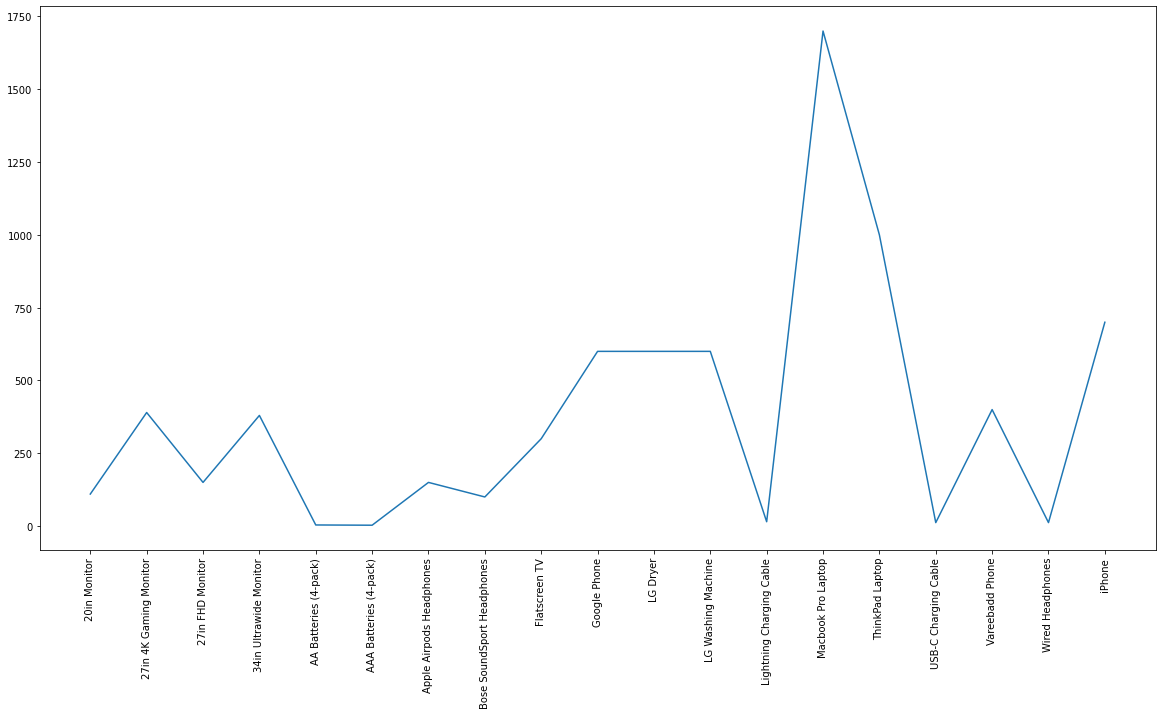

In [9]:
prices=df.groupby('Product').mean()['Price Each']

plt.figure(figsize=(20,10))
plt.plot(products,prices)
plt.xticks(products,rotation='vertical')
plt.show()

After studying both the graphs we can 